In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/cleaned_dataset.csv')
#df.shape

#### Smoothing and feature augmentation (only if needed!)

In [4]:
#df['Power-Prop V_smoothed'] = df['Power-Prop V'].rolling(window=200, center=True).mean()
#df['Power-Prop V_smoothed'].fillna(df['Power-Prop V'], inplace=True)
#df['Power-Prop V_smoothed'] = df['Power-Prop V_smoothed'] + np.random.normal(0, 0.001, size=len(df))

In [5]:
timeLine = np.arange(0,16744,1)

In [6]:
import matplotlib.pyplot as plt

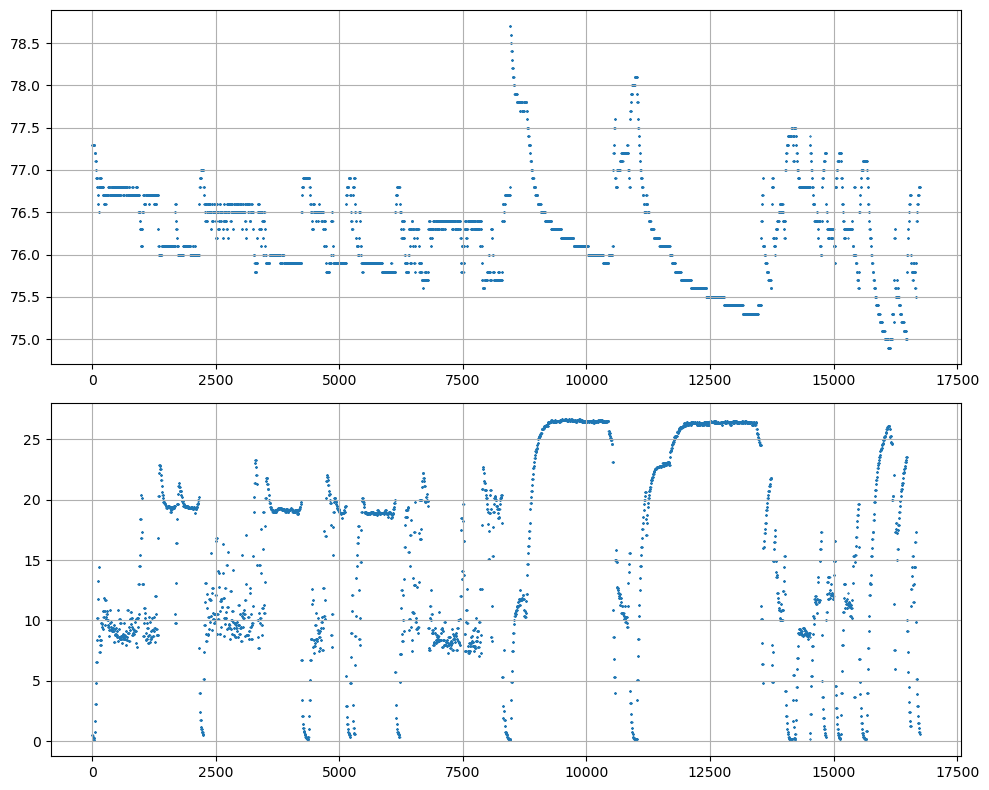

In [7]:
fig, axe = plt.subplots(nrows=2, ncols=1,figsize=(10,8))

axe[0].scatter(timeLine, df['Power-Prop V'],s=0.1)
axe[0].grid(True)

axe[1].scatter(timeLine, df['Power-Prop I'],s=0.1)
axe[1].grid(True)

plt.tight_layout()
#plt.savefig("D:/AIjourney/newPics/mixMod_200_0001.png", format="png", dpi=300)
plt.show()

In [8]:
#print(df['Power-Prop V'].iloc[100:110])
#print(df['Power-Prop V_smoothed'].iloc[100:110])
#df[8800:8820]

In [9]:
#Ymain = df[['Power-Prop I', 'Power-Prop V']]
#Ymain = np.array(Ymain)
#Ymain = outputScaler.transform(Ymain)

In [10]:
inputScaler = MinMaxScaler()
outputScaler = MinMaxScaler()

In [11]:
X = df[['Power-Prop V']]
Y = df[['Power-Prop I']]

In [12]:
X_norm = inputScaler.fit_transform(X)
Y_norm = outputScaler.fit_transform(Y)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_norm, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [15]:
modelNN = Sequential()
modelNN.add(Input(shape=(1,)))  
modelNN.add(Dense(128, activation='relu'))  
modelNN.add(Dense(64, activation='relu'))   
modelNN.add(Dense(32, activation='relu'))   
modelNN.add(Dense(1))  

modelNN.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
history = modelNN.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.1596 - val_loss: 0.0351
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0341 - val_loss: 0.0343
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0337 - val_loss: 0.0342
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0340 - val_loss: 0.0349
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0334 - val_loss: 0.0344
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0339 - val_loss: 0.0337
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0331 - val_loss: 0.0331
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0330 - val_loss: 0.0332
Epoch 9/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0319 - val_loss: 0.0332
Epoch 10/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0324 - val_loss: 0.0339
Epoch 11/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0317 - val_loss: 0.0329
Epoch 12/100
335/335 ━━━━━━━━━━━━━━━━━━━━

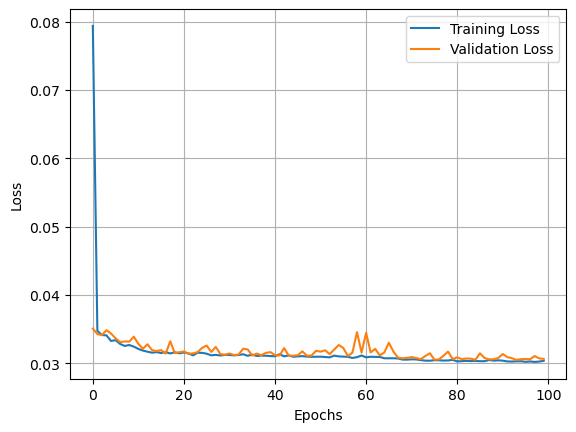

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
prediction1 = modelNN.predict(X_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [19]:
# not necessary
test_loss = modelNN.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss}')

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0301
Test Loss: 0.030933372676372528


In [20]:
from sklearn.metrics import r2_score

In [21]:
evalCurrent = r2_score(Y_test, prediction1)

print('Current prediction accuracy:',evalCurrent)

Current prediction accuracy: 0.6537688347966657


In [22]:
predTotal = modelNN.predict(X_norm)

524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
print(r2_score(Y_norm, predTotal), 'For current (whole dataset!)')

0.6581078635897175 For current (whole dataset!)


In [24]:
deNormPred = outputScaler.inverse_transform(predTotal)

In [25]:
#print(predTotal[8800:8810])
#print(deNormPred[8800:8810])

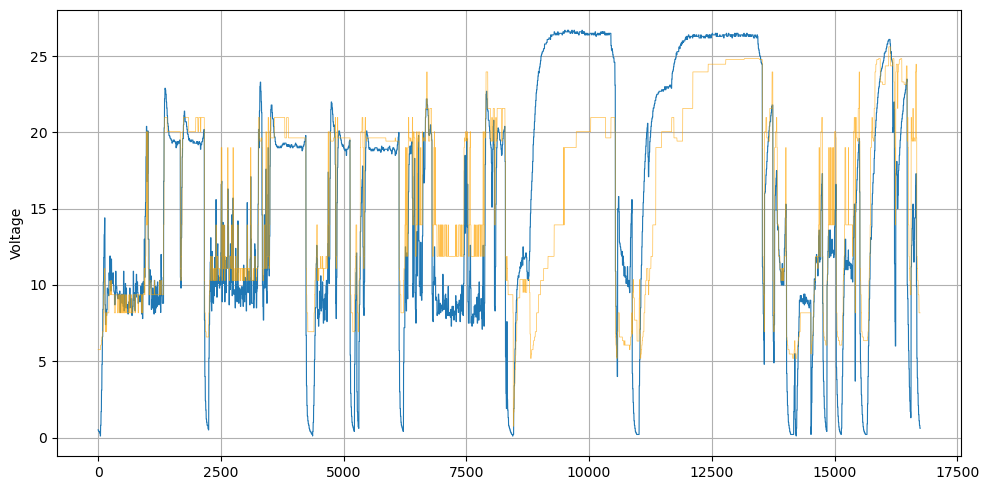

In [26]:
plt.figure(figsize=(10,5))
plt.plot(timeLine, df['Power-Prop I'],linewidth=0.8)
plt.plot(timeLine, deNormPred,alpha=0.7,linewidth=0.5,color="orange")
plt.ylabel('Voltage')
plt.grid(True)

plt.tight_layout()
#plt.savefig("D:/AIjourney/newPics/V&I test/VandI_mainSet1.png", format="png", dpi=300)
plt.show()

In [27]:
dfTest1 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest1.csv')
dfTest2 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest2.csv')
dfTest3 = pd.read_csv('D:/AIjourney/DataSets/Roshd Center/CleanedTest3.csv')

In [28]:
test1_X = dfTest1[['Power-Prop V']]
test1_Y = dfTest1[['Power-Prop I']]

test2_X = dfTest2[['Power-Prop V']]
test2_Y = dfTest2[['Power-Prop I']]

test3_X = dfTest3[['Power-Prop V']]
test3_Y = dfTest3[['Power-Prop I']]

In [29]:
test1_X_norm = inputScaler.transform(test1_X)
test2_X_norm = inputScaler.transform(test2_X)
test3_X_norm = inputScaler.transform(test3_X)

#test1_Y_norm = outputScaler.transform(test1_Y)
#test2_Y_norm = outputScaler.transform(test2_Y)
#test3_Y_norm = outputScaler.transform(test3_Y)

In [30]:
predTest1 = modelNN.predict(test1_X_norm)
predTest2 = modelNN.predict(test2_X_norm)
predTest3 = modelNN.predict(test3_X_norm)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [31]:
predTest1_deNorm = outputScaler.inverse_transform(predTest1)
predTest2_deNorm = outputScaler.inverse_transform(predTest2)
predTest3_deNorm = outputScaler.inverse_transform(predTest3)

In [32]:
print('Current accuracy test1:',r2_score(test1_Y['Power-Prop I'], predTest1_deNorm))
print('\n')
print('Current accuracy test2:',r2_score(test2_Y['Power-Prop I'], predTest2_deNorm))
print('\n')
print('Current accuracy test3:',r2_score(test3_Y['Power-Prop I'], predTest3_deNorm))

Current accuracy test1: 0.10294227929868249


Current accuracy test2: 0.29300170884045007


Current accuracy test3: 0.6912898657595692


In [33]:
test1_Ynp = np.array(test1_Y)
test2_Ynp = np.array(test2_Y)
test3_Ynp = np.array(test3_Y)

In [34]:
time1 = np.arange(0,1564,1)
time2 = np.arange(0,1719,1)
time3 = np.arange(0,2283,1)

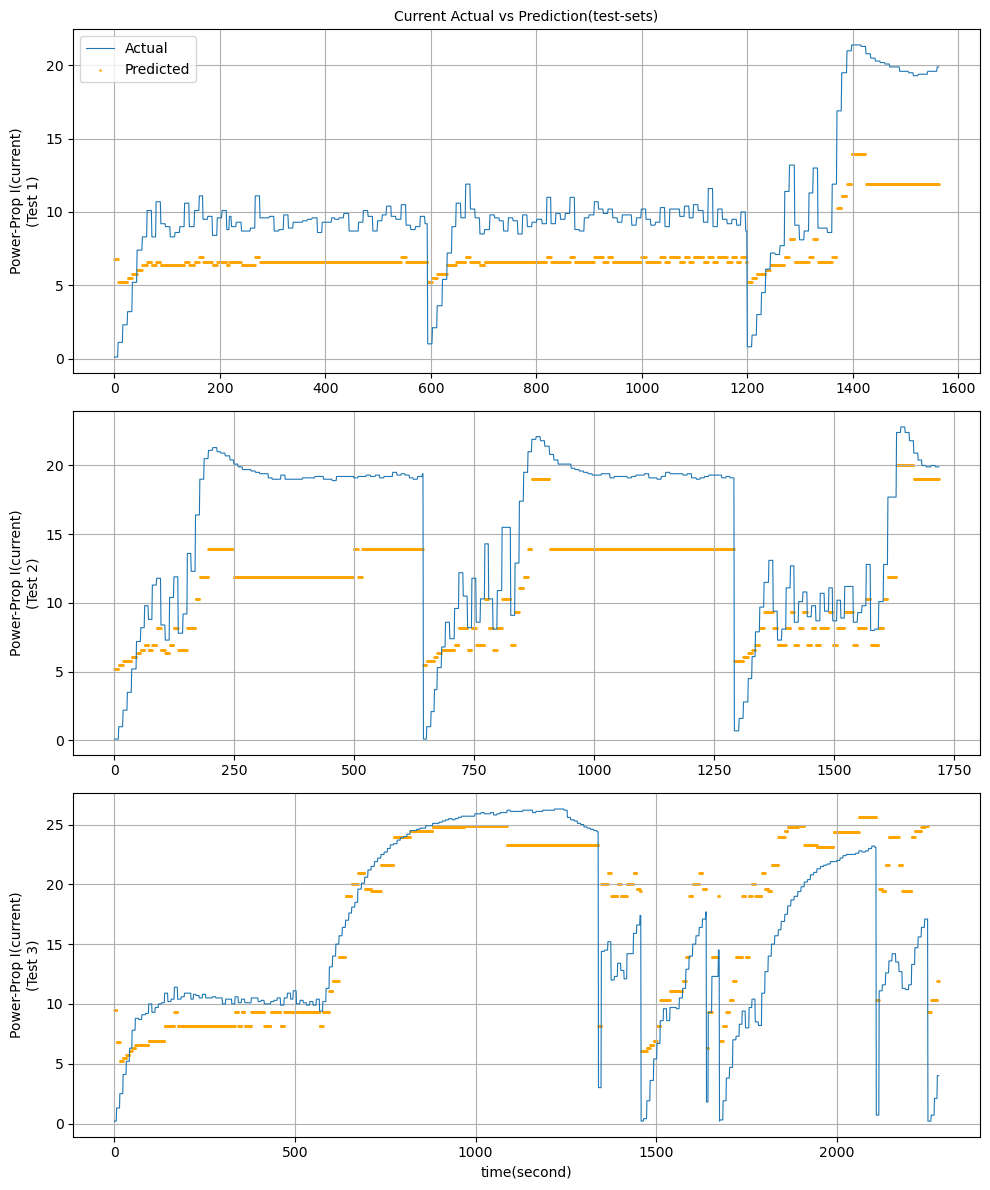

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

axes[0].plot(time1,test1_Ynp,linewidth=0.8, label='Actual')
axes[0].scatter(time1,predTest1_deNorm,alpha=0.8,s=1,label='Predicted',color='orange')
axes[0].set_ylabel('Power-Prop I(current)\n(Test 1)',fontsize=10)
axes[0].set_title('Current Actual vs Prediction(test-sets)',fontsize=10)
axes[0].grid(True)

axes[1].plot(time2,test2_Ynp,linewidth=0.8)
axes[1].scatter(time2,predTest2_deNorm,alpha=0.8,s=1,color='orange')
axes[1].set_ylabel('Power-Prop I(current)\n(Test 2)',fontsize=10)
axes[1].grid(True)


axes[2].plot(time3,test3_Ynp,linewidth=0.8)
axes[2].scatter(time3,predTest3_deNorm,alpha=0.8,s=1,color='orange')
axes[2].set_ylabel('Power-Prop I(current)\n(Test 3)',fontsize=10)
axes[2].set_xlabel('time(second)')
axes[2].grid(True)


plt.tight_layout()
axes[0].legend()
#plt.savefig("D:/AIjourney/newPics/V&I test/VandI_testSet1.png", format="png", dpi=300)
plt.show()

### Second Step : testing with 3 inputs!

In [37]:
X_new = df[['Power-Prop V','Depth1','Motor-FB']]
Y_new = df[['Power-Prop I']]

In [38]:
#X_new.head()
#Y_new.head()

In [39]:
inputScalerNew = MinMaxScaler()

In [40]:
X_new_norm = inputScalerNew.fit_transform(X_new)
Y_new_norm = outputScaler.transform(Y_new)

In [41]:
#print(X_new_norm[1000:1010])
#print(Y_new_norm[1000:1010])

In [42]:
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new_norm, Y_new_norm, test_size=0.2, random_state=42)

In [43]:
modelNN_new = Sequential()
modelNN_new.add(Input(shape=(3,)))  
modelNN_new.add(Dense(128, activation='relu'))  
modelNN_new.add(Dense(64, activation='relu'))   
modelNN_new.add(Dense(32, activation='relu'))   
modelNN_new.add(Dense(1))  

modelNN_new.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
history_new = modelNN_new.fit(X_new_train, Y_new_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0526 - val_loss: 0.0070
Epoch 2/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0068 - val_loss: 0.0056
Epoch 3/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 4/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 5/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0046 - val_loss: 0.0054
Epoch 6/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 7/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 8/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 10/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 11/100
335/335 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0032 - val_loss: 0.0035
Epoch 12/100
335/335 ━━━━━━━━━━━━━━━━━━━━

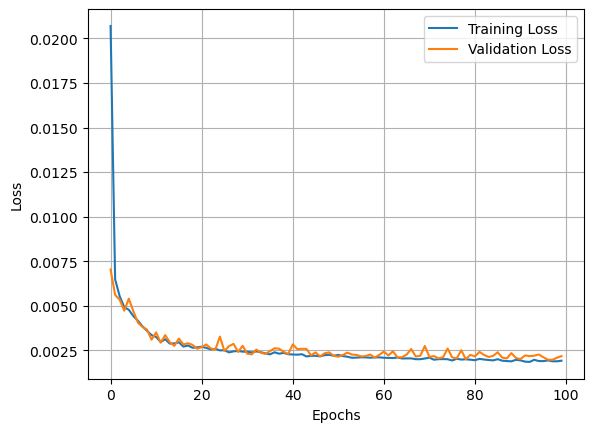

In [45]:
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Prediction with 3 inputs:


In [47]:
prediction1_new = modelNN_new.predict(X_new_test)

# not necessary
test_loss_new = modelNN_new.evaluate(X_new_test, Y_new_test)
print(f'Test Loss: {test_loss_new}')

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025
Test Loss: 0.002314073033630848


In [48]:
evalCurrent_new = r2_score(Y_new_test, prediction1_new)

print('Current prediction accuracy(3 inputs):',evalCurrent_new)

Current prediction accuracy(3 inputs): 0.9740990210700539


In [49]:
predTotal_new = modelNN_new.predict(X_new_norm)
print(r2_score(Y_new_norm, predTotal_new), 'For current (whole dataset!)')

524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.9774641140197324 For current (whole dataset!)


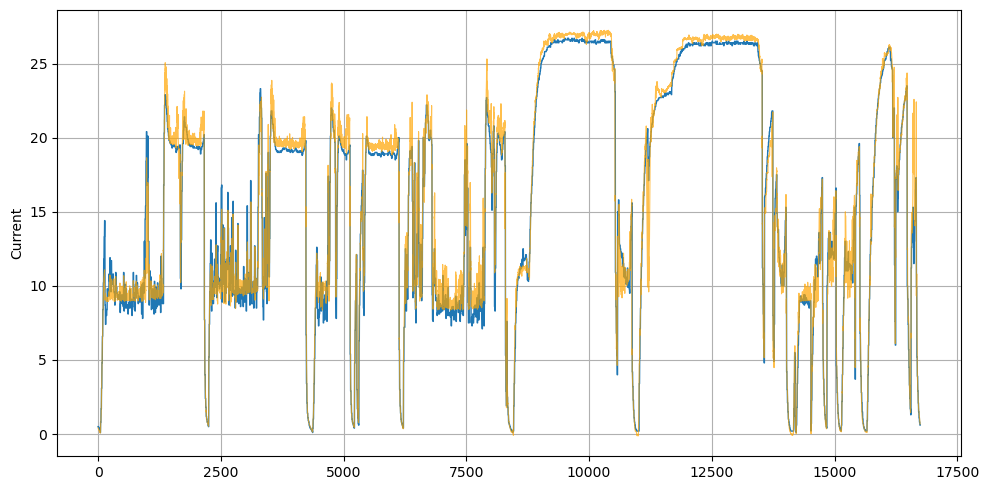

In [50]:
deNormPred_new = outputScaler.inverse_transform(predTotal_new)

plt.figure(figsize=(10,5))
plt.plot(timeLine, df['Power-Prop I'],linewidth=1)
plt.plot(timeLine, deNormPred_new,alpha=0.7,linewidth=0.8,color="orange")
plt.ylabel('Current')
plt.grid(True)

plt.tight_layout()
#plt.savefig("D:/AIjourney/newPics/V&I test/VandI_Multi_mainSet1.png", format="png", dpi=300)
plt.show()

### Testing model with secondary datasets (3 inputs):

In [52]:
test1_X_new = dfTest1[['Power-Prop V','Depth1','Motor-FB']]
test1_Y_new = dfTest1[['Power-Prop I']]

test2_X_new = dfTest2[['Power-Prop V','Depth1','Motor-FB']]
test2_Y_new = dfTest2[['Power-Prop I']]

test3_X_new = dfTest3[['Power-Prop V','Depth1','Motor-FB']]
test3_Y_new = dfTest3[['Power-Prop I']]

In [53]:
test1_X_new_norm = inputScalerNew.transform(test1_X_new)
test2_X_new_norm = inputScalerNew.transform(test2_X_new)
test3_X_new_norm = inputScalerNew.transform(test3_X_new)

predTest1_new = modelNN_new.predict(test1_X_new_norm)
predTest2_new = modelNN_new.predict(test2_X_new_norm)
predTest3_new = modelNN_new.predict(test3_X_new_norm)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [54]:
predTest1_deNorm_new = outputScaler.inverse_transform(predTest1_new)
predTest2_deNorm_new = outputScaler.inverse_transform(predTest2_new)
predTest3_deNorm_new = outputScaler.inverse_transform(predTest3_new)

In [55]:
print('Current accuracy test1:',r2_score(test1_Y_new['Power-Prop I'], predTest1_deNorm_new))
print('\n')
print('Current accuracy test2:',r2_score(test2_Y_new['Power-Prop I'], predTest2_deNorm_new))
print('\n')
print('Current accuracy test3:',r2_score(test3_Y_new['Power-Prop I'], predTest3_deNorm_new))

Current accuracy test1: 0.8684639715179797


Current accuracy test2: 0.7097694500751692


Current accuracy test3: 0.9351682826683599


In [56]:
test1_Ynp_new = np.array(test1_Y_new)
test2_Ynp_new = np.array(test2_Y_new)
test3_Ynp_new = np.array(test3_Y_new)

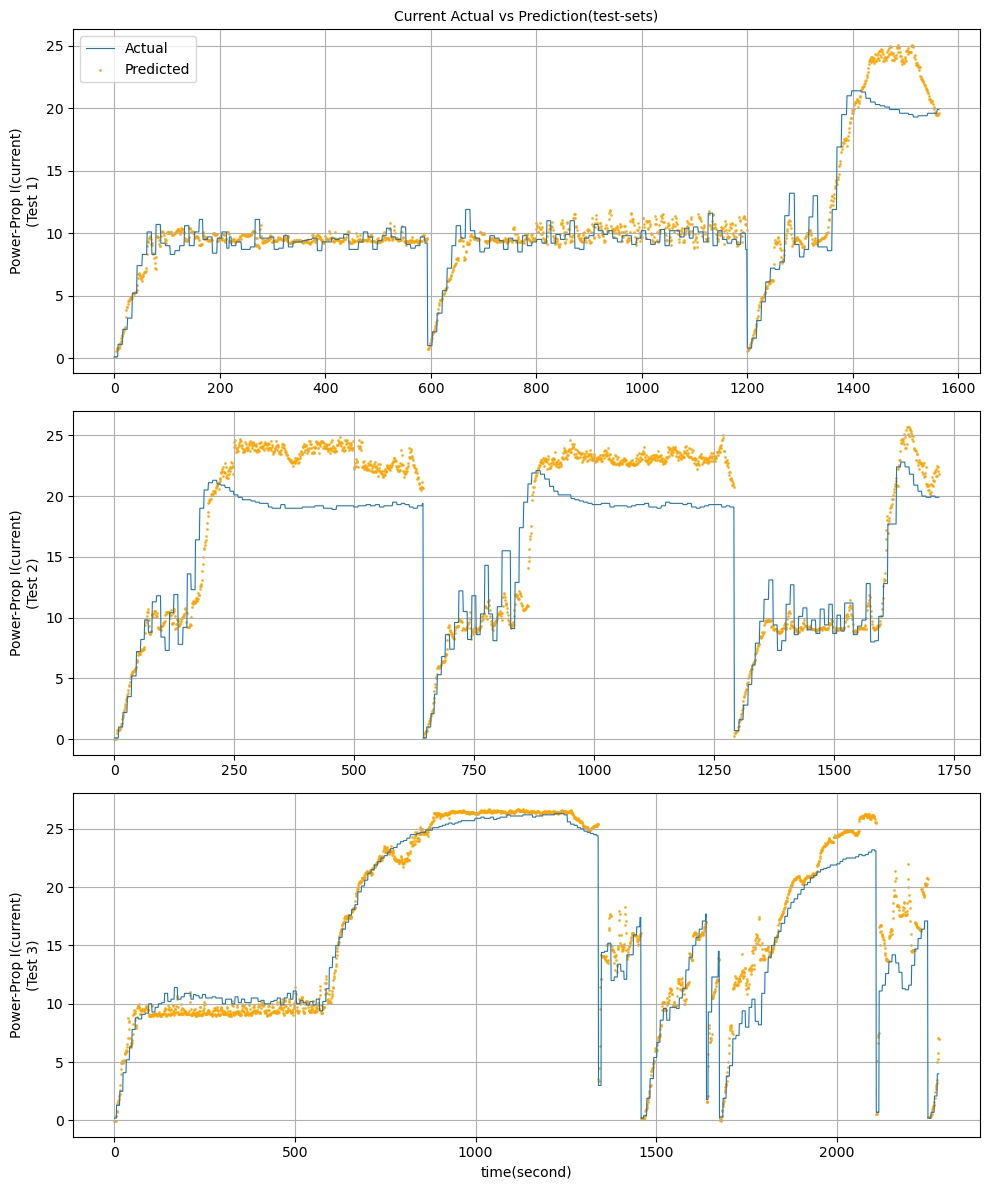

In [57]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

axes[0].plot(time1,test1_Ynp_new,linewidth=0.8, label='Actual')
axes[0].scatter(time1,predTest1_deNorm_new,alpha=0.8,s=1,label='Predicted',color='orange')
axes[0].set_ylabel('Power-Prop I(current)\n(Test 1)',fontsize=10)
axes[0].set_title('Current Actual vs Prediction(test-sets)',fontsize=10)
axes[0].grid(True)

axes[1].plot(time2,test2_Ynp_new,linewidth=0.8)
axes[1].scatter(time2,predTest2_deNorm_new,alpha=0.8,s=1,color='orange')
axes[1].set_ylabel('Power-Prop I(current)\n(Test 2)',fontsize=10)
axes[1].grid(True)


axes[2].plot(time3,test3_Ynp_new,linewidth=0.8)
axes[2].scatter(time3,predTest3_deNorm_new,alpha=0.8,s=1,color='orange')
axes[2].set_ylabel('Power-Prop I(current)\n(Test 3)',fontsize=10)
axes[2].set_xlabel('time(second)')
axes[2].grid(True)


plt.tight_layout()
axes[0].legend()
#plt.savefig("D:/AIjourney/newPics/V&I test/VandI_Multi_testSet1.png", format="png", dpi=300)
plt.show()